### Hotel Booking Cancellations and ADR Trends

This analysis investigates booking cancellations and trends in Average Daily Rate (ADR) within the hospitality industry, focusing on customer satisfaction and operational efficiency. Using a publicly available dataset, we examined seasonal patterns, demographics, and key factors influencing cancellations to derive actionable insights for hotel management.

## Importing important Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset: Start by importing the dataset

In [6]:
df = pd.read_csv("hotel_bookings.csv")


#### Data cleaning basically involves following steps:
##### - Identify the data types
##### - fixing the rows and columns
##### - Handle the missing values
##### - Handling outliers
##### - fixing invalid values

In [7]:
df.shape # It tells about the number of rows and columns

(119390, 32)

In [8]:
df.info() # It tells about data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.describe() # It tells statistics of data.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.isnull().sum() # It tells about the null values in particular column.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.duplicated().sum() # It tells about the total duplicate rows.

31994

#### Handling the duplicate values

In [14]:
df.drop_duplicates(inplace = True) # It will remove all the duplicate rows.

In [16]:
df.shape

(87396, 32)

In [17]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


#### Handling missing Values by imputing proper value

#### As we can see that there are four columns where values are missing:-
- Company - Here almost 90% data are missing so imputing values isn't going to be useful so its better to drop this column.
- Agent - Impute 0 in place of missing value as this is numerical column.
- Children - Imputing 0 because where there is missing value we are assuming that person has no child.
- Country - we will impute Unknown as this is categorical column.

In [27]:
df.drop('company', axis=1, inplace = True)

In [31]:
df['agent'].fillna(0, inplace=True)
df['children'].fillna(0, inplace=True)

In [24]:
print(df['country'])

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 87396, dtype: object


In [33]:
df['country'].fillna('Unknown', inplace=True)

In [32]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### Convert 'reservation_status_date' to datetime

In [34]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


### EDA

## Booking Seasonality Analysis

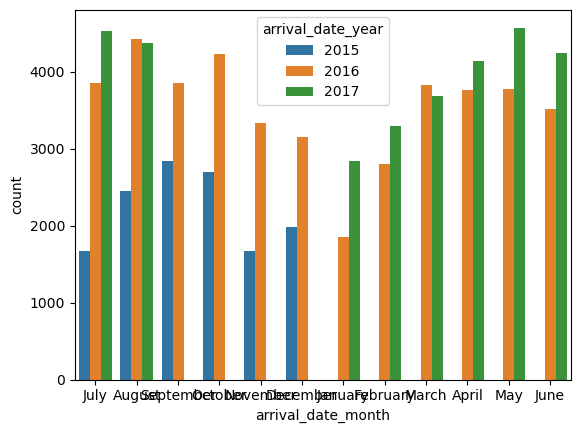

<Figure size 2000x2000 with 0 Axes>

In [42]:
sns.countplot(data=df, x='arrival_date_month', hue='arrival_date_year')
plt.figure(figsize=(20, 20))
plt.show()

Insight - Mostly people arrived during the month May to August and very less people during the January month

Interpretation
Peak Season (May to August): This period likely corresponds to summer or popular vacation months, attracting more visitors. Hotels might observe high occupancy rates during this time and could consider increasing rates slightly or offering special packages to maximize revenue while meeting high demand.

Off-Peak Season (January): The lower occupancy in January indicates a quieter period, possibly due to colder weather or post-holiday slowdown. During this time, hotels might attract more guests by offering discounts, promotional offers, or bundled deals (e.g., discounted stays with meals or services) to improve occupancy.

Operational Insight
The hotel management can use this trend for resource planning by:

- Increasing staff and resources during peak months to handle the influx.
- Reducing operations or offering incentives in quieter months to attract bookings and manage costs.
- Understanding such seasonality helps in pricing strategies, marketing focus, and planning for customer demands throughout the year.

### Distribution of Stays by Hotel Type

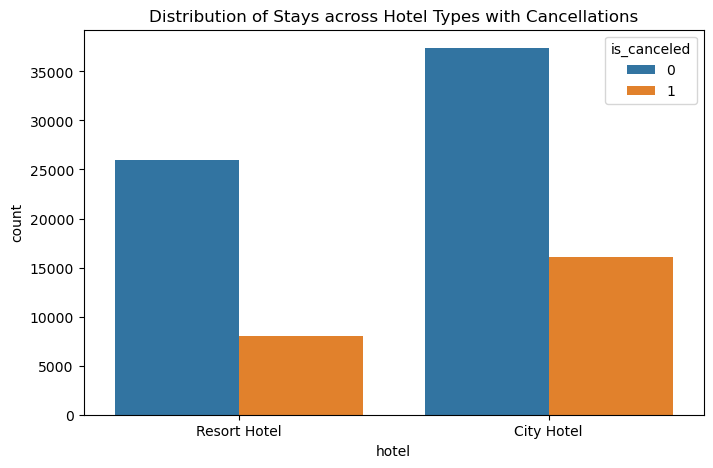

In [43]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title("Distribution of Stays across Hotel Types with Cancellations")
plt.show()

### Average Daily Rate (ADR) Trends

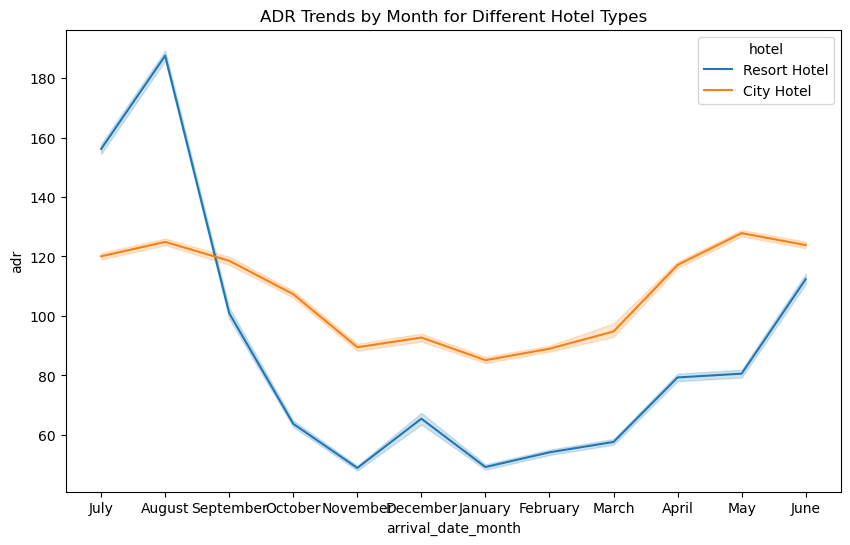

In [44]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arrival_date_month', y='adr', hue='hotel')
plt.title("ADR Trends by Month for Different Hotel Types")
plt.show()

ADR for Resort hotel is high in July month and it starts decreasing and starts again rising in January and for City hotelNot big difference like its same as Resort but not big difference in ADR

Interpretation
Resort Hotels:

High ADR in July: Likely due to peak summer demand, where more guests seek resort experiences, leading to higher prices.
Decrease after July: As summer ends, demand drops, leading to a decrease in ADR.
Rise again in January: This could correspond to winter holidays, where resorts attract visitors for a getaway, albeit not as high as during summer.
City Hotels:

Less Pronounced Variation: City hotels see smaller fluctuations in ADR compared to resorts. This suggests demand is steadier throughout the year, possibly due to business travelers, events, or consistent urban tourism.
Operational Insight
The hotel management can use these ADR trends to optimize revenue by:

Resort Hotels: Strategically increasing ADR during peak months (like July) and offering winter promotions for January. Targeted marketing campaigns and bundled offers can also boost off-peak occupancy.

City Hotels: Maintaining consistent pricing with minor adjustments can be beneficial, catering to a more stable customer base. The hotel could explore corporate packages or flexible rates for city events and peak tourism times to capture steady revenue.

### Cancellation Rates by Lead Time

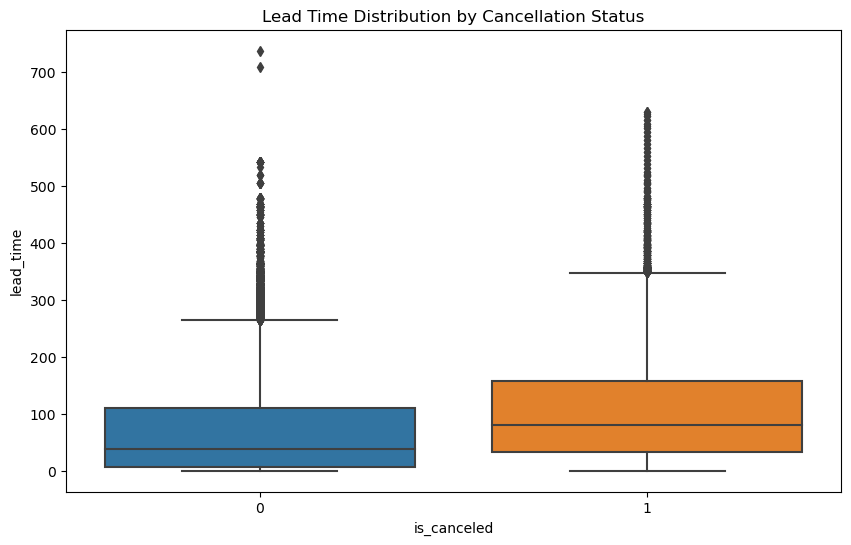

In [45]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title("Lead Time Distribution by Cancellation Status")
plt.show()

### Hypothesis Testing

#### Hypothesis 1:  The ADR difference - Weekday vs. Weekend 

In [47]:
from scipy.stats import chi2_contingency, ttest_ind

In [48]:
# Creating a weekday/weekend column
df['is_weekend'] = df['reservation_status_date'].dt.dayofweek >= 5
weekend_adr = df[df['is_weekend']]['adr']
weekday_adr = df[~df['is_weekend']]['adr']
t_stat, p_value = ttest_ind(weekend_adr, weekday_adr)
print(f"T-Test - p-value: {p_value}")

T-Test - p-value: 2.7229477005971784e-17


##### The p-value from the T-test, 2.72e-17, is extremely small, which indicates strong evidence against the null hypothesis. So the Conclusion is There is a significant difference in ADR between weekday and weekend bookings, and this insight could be useful for hotel management to consider differential pricing or marketing strategies based on days of the week.

#### Feature Engineering 

In [57]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['adults'] > 1) | (df['children'] > 0) | (df['babies'] > 0)).astype(int)
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 180, 365], labels=['<30', '30-60', '60-90', '90-180', '>180'])
df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_weekend_stay'] = (df['stays_in_weekend_nights'] > 0).astype(int)
df['family_size'] = df['adults'] + df['children'].fillna(0) + df['babies']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Training & Testing 

In [52]:
features = ['lead_time', 'total_nights', 'is_family', 'adr', 'previous_cancellations', 'is_repeated_guest', 'required_car_parking_spaces']
X = df[features]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [54]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [55]:
# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression Performance:
Accuracy: 0.7382151029748284
Precision: 0.5918367346938775
Recall: 0.11607330945860543
F1 Score: 0.19408242338851708

Random Forest Performance:
Accuracy: 0.7244279176201373
Precision: 0.4909232365145228
Recall: 0.3987781756899094
F1 Score: 0.44007904219458327


#### Optimization

#### For Random Forest and Logistic Regression in scikit-learn, you can set class_weight='balanced' to give higher importance to the cancellation class.

In [56]:
# Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(class_weight='balanced', random_state=42)

In [59]:
from sklearn.model_selection import GridSearchCV


In [61]:
# Logistic Regression Hyperparameter Tuning
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='f1')
grid_log.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [60]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [63]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# XGBoost with class balancing
xgb = XGBClassifier(scale_pos_weight=len(y_train) / y_train.sum())

# Voting Classifier with different models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', grid_log.best_estimator_),
    ('rf', grid_rf.best_estimator_),
    ('xgb', xgb)
], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=100, class_weight='balanced',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=15,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample...
                                            gpu_i

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [66]:
print(f"Optimized Model Performance:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

Optimized Model Performance:
Accuracy: 0.6229405034324943
Precision: 0.4040782355389097
Recall: 0.8182009690330735
F1 Score: 0.540984748241521


Accuracy (62.29%): The model correctly classifies 62.29% of the total cases, which is moderate. However, accuracy alone isn't sufficient for evaluating this model, especially if the cancellation cases (positive class) are a smaller subset.

Precision (40.41%): This indicates that, of all the bookings the model predicts as "cancellations," only 40.41% are actual cancellations. This lower precision shows that the model may still be predicting some non-cancellations as cancellations, which could lead to unnecessary actions like over-preparing for cancellations.

Recall (81.82%): The high recall indicates that the model captures a large portion (81.82%) of actual cancellations, which is important because it reduces the chance of missing potential cancellations.

F1 Score (54.10%): The F1 score balances precision and recall, reflecting an overall improvement, especially with the high recall. However, the trade-off is evident as precision has decreased.

Summary
This optimized model is better at identifying potential cancellations (high recall) but at the expense of precision. It may be helpful for cases where avoiding missed cancellations is critical, even if some false positives are acceptable.






